Loading MNIST dataset...
Dataset loaded successfully!
Feature shape: (70000, 784)
Label shape: (70000,)
Training samples: 56000
Testing samples: 14000
Training Logistic Regression model...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model training completed!

Test Accuracy: 91.64%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1381
           1       0.95      0.96      0.96      1575
           2       0.92      0.89      0.90      1398
           3       0.89      0.89      0.89      1428
           4       0.93      0.91      0.92      1365
           5       0.87      0.87      0.87      1263
           6       0.94      0.95      0.94      1375
           7       0.92      0.94      0.93      1459
           8       0.89      0.88      0.89      1365
           9       0.90      0.89      0.89      1391

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



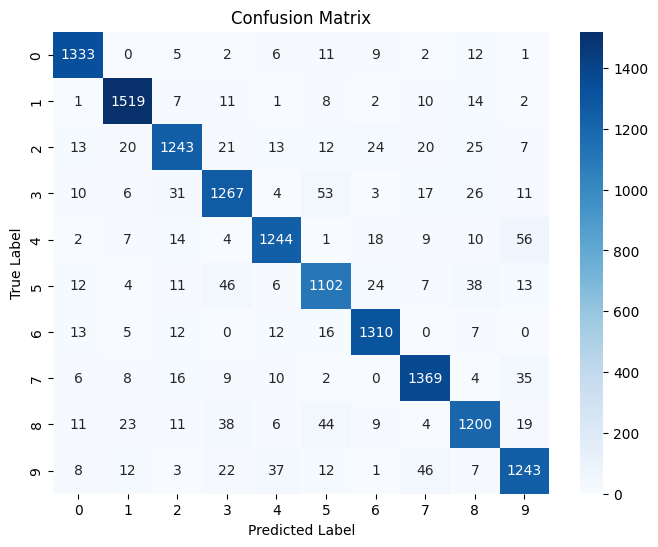

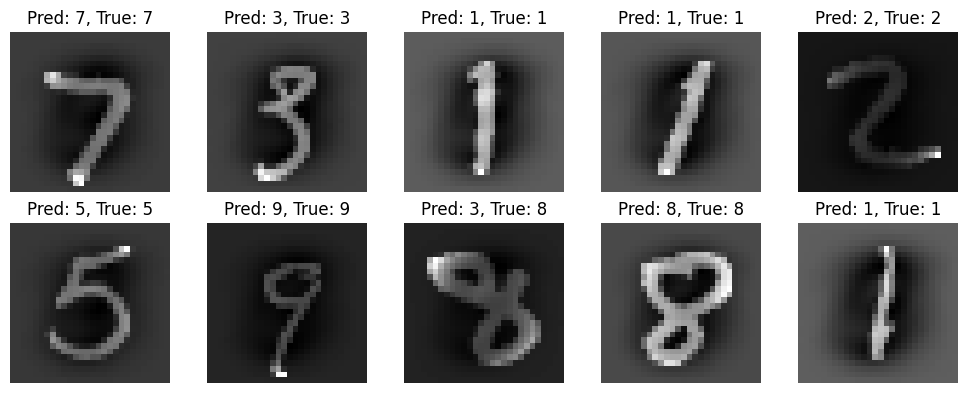

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Load the MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
print("Dataset loaded successfully!")
print("Feature shape:", X.shape)
print("Label shape:", y.shape)

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# Step 3: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train Logistic Regression model
print("Training Logistic Regression model...")
model = LogisticRegression(
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=1000
)
model.fit(X_train, y_train)
print("Model training completed!")

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 7: Visualize predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}, True: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
